In [5]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import matplotlib.pyplot as plt


1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

In [7]:
reg =  geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g')
com =  geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g')
prov =  geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g')
redditi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.csv")
redditi.crs = 'epsg:4326'

In [8]:
redditi

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,Reddito complessivo da 26000 a 55000 euro - Frequenza,Reddito complessivo da 26000 a 55000 euro - Ammontare in euro,Reddito complessivo da 55000 a 75000 euro - Frequenza,Reddito complessivo da 55000 a 75000 euro - Ammontare in euro,Reddito complessivo da 75000 a 120000 euro - Frequenza,Reddito complessivo da 75000 a 120000 euro - Ammontare in euro,Reddito complessivo oltre 120000 euro - Frequenza,Reddito complessivo oltre 120000 euro - Ammontare in euro,field_51,geometry
0,2020,A001,028001,ABANO TERME,PD,Veneto,05,14831,7564,9593119,...,3268,114839495,413,26106754,400,37267762,177,35077122,,None
1,2020,A004,098001,ABBADIA CERRETO,LO,Lombardia,03,208,89,78204,...,41,1302555,,,,,0,0,,None
2,2020,A005,097001,ABBADIA LARIANA,LC,Lombardia,03,2451,1205,1802637,...,656,22609959,78,4903386,48,4323860,31,5299024,,None
3,2020,A006,052001,ABBADIA SAN SALVATORE,SI,Toscana,09,4855,2667,2731533,...,754,25651776,69,4391549,33,3001230,13,2879460,,None
4,2020,A007,095001,ABBASANTA,OR,Sardegna,20,1728,885,739857,...,430,14325272,26,1655926,13,1172342,,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2020,M428,075098,PRESICCE-ACQUARICA,LE,Puglia,16,6251,2376,2132368,...,580,19690477,31,1911397,25,2212573,15,3447739,,None
7900,2020,M429,022252,BORGO D'ANAUNIA,TN,Trentino Alto Adige(P.A.Trento),04,2050,803,1304716,...,498,17366505,35,2265069,21,1848437,8,1959769,,None
7901,2020,M430,022253,NOVELLA,TN,Trentino Alto Adige(P.A.Trento),04,3579,1210,1659890,...,667,22868038,40,2490656,31,2852464,10,1876163,,None
7902,2020,M431,022254,VILLE DI FIEMME,TN,Trentino Alto Adige(P.A.Trento),04,2102,896,1015747,...,497,17515916,47,2946010,21,2064994,20,3869894,,None


In [9]:
reg

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [10]:
regioni = reg['DEN_REG']
regioni

0                  Piemonte
1             Valle d'Aosta
2                 Lombardia
3       Trentino-Alto Adige
4                    Veneto
5     Friuli Venezia Giulia
6                   Liguria
7            Emilia-Romagna
8                   Toscana
9                    Umbria
10                   Marche
11                    Lazio
12                  Abruzzo
13                   Molise
14                 Campania
15                   Puglia
16               Basilicata
17                 Calabria
18                  Sicilia
19                 Sardegna
Name: DEN_REG, dtype: object

In [11]:
CR = reg['COD_RIP']
CR

0     1
1     1
2     1
3     2
4     2
5     2
6     1
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    4
17    4
18    5
19    5
Name: COD_RIP, dtype: int64

In [12]:
com

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [13]:
prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [14]:
L = redditi['Reddito da fabbricati - Ammontare in euro']
L

0       9593119
1         78204
2       1802637
3       2731533
4        739857
         ...   
7899    2132368
7900    1304716
7901    1659890
7902    1015747
7903       5160
Name: Reddito da fabbricati - Ammontare in euro, Length: 7904, dtype: object

1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

In [15]:
result = pd.concat([redditi, reg], join='inner')
result

,geometry
0,None
1,None
2,None
3,None
4,None
...,...
15,"MULTIPOLYGON (((1280636.11070 4454459.74640, 1..."
16,"MULTIPOLYGON (((1073707.06130 4445700.10580, 1..."
17,"MULTIPOLYGON (((1083358.84610 4416348.74110, 1..."
18,"MULTIPOLYGON (((822886.61110 3935355.88900, 82..."


In [16]:
redditi['Reddito da fabbricati - Ammontare in euro']=redditi['Reddito da fabbricati - Ammontare in euro'].astype(int)
redditi['Reddito da fabbricati - Ammontare in euro']

0       9593119
1         78204
2       1802637
3       2731533
4        739857
         ...   
7899    2132368
7900    1304716
7901    1659890
7902    1015747
7903       5160
Name: Reddito da fabbricati - Ammontare in euro, Length: 7904, dtype: int64

In [17]:
reddito_lavoro = pd.merge(redditi ,reg,left_on='Regione',right_on='DEN_REG').groupby('Regione')['Reddito da fabbricati - Ammontare in euro'].sum()
reddito_lavoro

Regione
Abruzzo                   422393515
Basilicata                134529422
Calabria                  378653750
Campania                 1854701696
Friuli Venezia Giulia     489610546
Lazio                    3182479247
Liguria                   985208168
Lombardia                4403665378
Marche                    568000657
Molise                     92061260
Piemonte                 1924700164
Puglia                   1399458804
Sardegna                  494557817
Sicilia                  1361619743
Toscana                  1937749327
Umbria                    292845801
Valle d'Aosta              76742698
Veneto                   2154039677
Name: Reddito da fabbricati - Ammontare in euro, dtype: int64

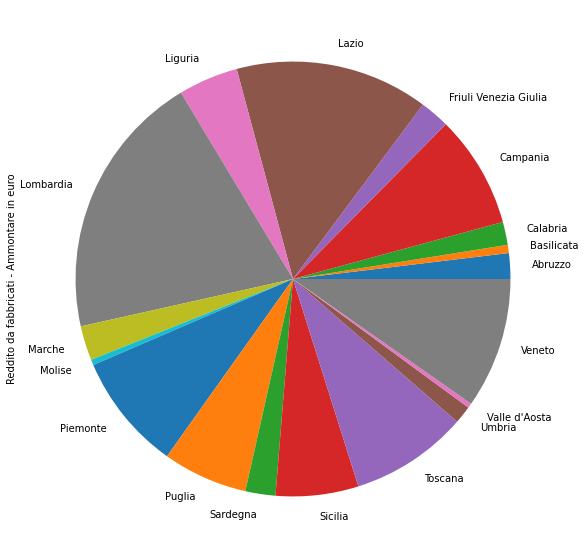

In [18]:
fig = plt.figure()
ax = plt.axes()
reddito_lavoro.plot(kind = 'pie', y='Regione', figsize=(10, 10))
plt.show()

2. l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali


In [19]:
redditi_prov = pd.merge(redditi,prov,left_on='Sigla Provincia',right_on='SIGLA')
bar= redditi_prov.groupby('DEN_UTS')['Reddito da fabbricati - Ammontare in euro'].sum()

In [20]:
redditi_prov = pd.merge(redditi,prov,left_on='Sigla Provincia',right_on='SIGLA')
redditi_prov

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry_y
0,2020,A001,028001,ABANO TERME,PD,Veneto,05,14831,7564,9593119,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
1,2020,A075,028002,AGNA,PD,Veneto,05,2285,1234,976622,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
2,2020,A161,028003,ALBIGNASEGO,PD,Veneto,05,19053,11136,11651098,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
3,2020,A296,028004,ANGUILLARA VENETA,PD,Veneto,05,3094,1558,930326,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
4,2020,A434,028005,ARQUA' PETRARCA,PD,Veneto,05,1370,763,910309,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,2020,D383,032001,DUINO-AURISINA,TS,Friuli Venezia Giulia,06,6714,3607,4781654,...,0,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
7899,2020,F378,032002,MONRUPINO,TS,Friuli Venezia Giulia,06,735,320,633014,...,0,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
7900,2020,F795,032003,MUGGIA,TS,Friuli Venezia Giulia,06,10310,5323,6210102,...,0,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
7901,2020,I715,032005,SGONICO,TS,Friuli Venezia Giulia,06,1617,785,1357206,...,0,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."


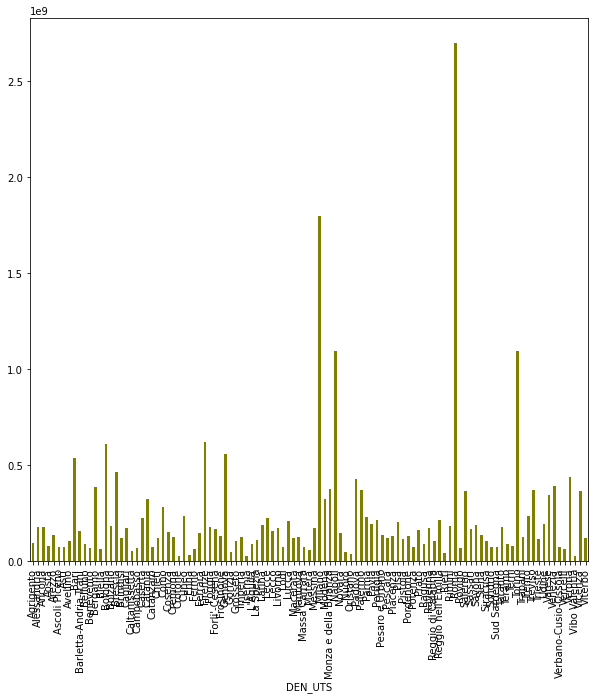

In [21]:
fig = plt.figure()
ax = plt.axes()
bar.plot(kind = 'bar', y='DEN_UTS', figsize=(10, 10),color='olive')
plt.show()

3. la prime 10 province più ricche

In [22]:
bar.sort_values(ascending=False).head(10)

DEN_UTS
Roma       2697756684
Milano     1799454070
Torino     1093487005
Napoli     1092930555
Firenze     622786615
Bologna     611511736
Genova      557635155
Bari        538011644
Brescia     465475318
Verona      437686107
Name: Reddito da fabbricati - Ammontare in euro, dtype: int64

4. la provincia più ricca


In [23]:
bar.sort_values(ascending=False).idxmax()

'Roma'

5. il reddito medio per ogni regione. Ordinare in ordine decrescente a partire dalla regione con il reddito medio più alto

In [24]:
redditi.groupby('Regione')['Reddito da fabbricati - Ammontare in euro'].mean().sort_values(ascending=False)

Regione
Lazio                               8.419257e+06
Toscana                             7.097983e+06
Emilia Romagna                      6.624063e+06
Puglia                              5.445365e+06
Liguria                             4.210291e+06
Veneto                              3.826003e+06
Sicilia                             3.491333e+06
Campania                            3.372185e+06
Umbria                              3.183107e+06
Lombardia                           2.924081e+06
Marche                              2.524447e+06
Friuli Venezia Giulia               2.277258e+06
Piemonte                            1.629721e+06
Trentino Alto Adige(P.A.Bolzano)    1.588402e+06
Trentino Alto Adige(P.A.Trento)     1.401890e+06
Abruzzo                             1.384897e+06
Sardegna                            1.311824e+06
Valle d'Aosta                       1.037063e+06
Basilicata                          1.026942e+06
Calabria                            9.372618e+05
Molise      

#6. dato il nome di una regione, inserito dall'utente, avere l'elenco delle province della regione con il reddito complessivo e il reddito medio


In [25]:
reg_u = input('inserire regione ')
reg1 = reg[reg["DEN_REG"] == reg_u]
prov_u=prov[prov.within(reg.geometry.squeeze())]
redditi_prov['medio']=redditi_prov['Reddito da fabbricati - Ammontare in euro'].mean()
red_com_med = pd.merge(prov_u,redditi_prov,on='DEN_UTS')[['Reddito da fabbricati - Ammontare in euro','medio']]
red_com_med

inserire regione Lombardia


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,Reddito da fabbricati - Ammontare in euro,medio
0,1200168,3.132472e+06
1,922669,3.132472e+06
2,341534,3.132472e+06
3,597512,3.132472e+06
4,4051040,3.132472e+06
...,...,...
307,5545301,3.132472e+06
308,3123009,3.132472e+06
309,2645569,3.132472e+06
310,393193,3.132472e+06


7. dato il nome di una provincia, inserito dall'utente, avere l'elenco dei comuni della provincia con il reddito. Ordinare in ordine crescente sul reddito. 


In [ ]:
reddito_comuni = pd.merge(comDenominazione Comune,)

In [27]:
prov_u = input('inserire provincia ')
prov1 = prov[prov["DEN_UTS"] == prov_u]
com_u=com[com.within(prov1.geometry.squeeze())]
com_u

inserire provincia Milano


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07,"POLYGON ((493446.898 5029705.643, 493602.897 5..."
1812,1,3,15,215,215,15005,015005,Albairate,None,0,18919.829233,1.567417e+07,"POLYGON ((495595.883 5032525.624, 495661.881 5..."
1813,1,3,15,215,215,15007,015007,Arconate,None,0,14414.349393,8.611972e+06,"POLYGON ((488023.938 5045041.530, 488050.939 5..."
1814,1,3,15,215,215,15009,015009,Arese,None,0,14252.406342,6.317493e+06,"POLYGON ((506416.116 5045124.529, 506782.458 5..."
1815,1,3,15,215,215,15010,015010,Arluno,None,0,18646.960825,1.278364e+07,"POLYGON ((496562.280 5041533.478, 496401.277 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1,3,15,215,215,15247,015247,Zibido San Giacomo,None,0,29317.414806,2.443786e+07,"POLYGON ((506102.367 5028375.154, 506991.706 5..."
1940,1,3,15,215,215,15248,015248,Villa Cortese,None,0,8393.080188,3.499843e+06,"POLYGON ((490864.917 5047319.512, 491416.914 5..."
1941,1,3,15,215,215,15249,015249,Vanzaghello,None,0,13065.614920,5.624381e+06,"POLYGON ((484327.133 5049844.538, 484144.917 5..."
1942,1,3,15,215,215,15250,015250,Baranzate,None,0,6567.963947,2.944838e+06,"POLYGON ((509363.172 5042554.492, 509538.293 5..."


In [28]:
redditi_prov

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry_y,medio
0,2020,A001,028001,ABANO TERME,PD,Veneto,05,14831,7564,9593119,...,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5...",3.132472e+06
1,2020,A075,028002,AGNA,PD,Veneto,05,2285,1234,976622,...,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5...",3.132472e+06
2,2020,A161,028003,ALBIGNASEGO,PD,Veneto,05,19053,11136,11651098,...,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5...",3.132472e+06
3,2020,A296,028004,ANGUILLARA VENETA,PD,Veneto,05,3094,1558,930326,...,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5...",3.132472e+06
4,2020,A434,028005,ARQUA' PETRARCA,PD,Veneto,05,1370,763,910309,...,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5...",3.132472e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,2020,D383,032001,DUINO-AURISINA,TS,Friuli Venezia Giulia,06,6714,3607,4781654,...,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",3.132472e+06
7899,2020,F378,032002,MONRUPINO,TS,Friuli Venezia Giulia,06,735,320,633014,...,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",3.132472e+06
7900,2020,F795,032003,MUGGIA,TS,Friuli Venezia Giulia,06,10310,5323,6210102,...,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",3.132472e+06
7901,2020,I715,032005,SGONICO,TS,Friuli Venezia Giulia,06,1617,785,1357206,...,32,Trieste,-,Trieste,TS,UnitÃ non amministrativa,113951.677382,2.124526e+08,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",3.132472e+06
